In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
data = pd.read_excel('Absenteeism_data.xlsx')
data.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,2015-07-07,289,36,33,239.554,30,1,2,1,4
1,36,0,2015-07-14,118,13,50,239.554,31,1,1,0,0
2,3,23,2015-07-15,179,51,38,239.554,31,1,0,0,2
3,7,7,2015-07-16,279,5,39,239.554,24,1,2,0,4
4,11,23,2015-07-23,289,36,33,239.554,30,1,2,1,2


In [50]:
df = data.copy()

In [51]:
df = df.drop(['ID'], axis=1)
df.head()

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,26,2015-07-07,289,36,33,239.554,30,1,2,1,4
1,0,2015-07-14,118,13,50,239.554,31,1,1,0,0
2,23,2015-07-15,179,51,38,239.554,31,1,0,0,2
3,7,2015-07-16,279,5,39,239.554,24,1,2,0,4
4,23,2015-07-23,289,36,33,239.554,30,1,2,1,2


In [52]:
df.describe()

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
count,700.000000,700,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,19.411429,2016-12-31 00:45:15.428571392,222.347143,29.892857,36.417143,271.801774,26.737143,1.282857,1.021429,0.687143,6.761429
min,0.000000,2015-07-06 00:00:00,118.000000,5.000000,27.000000,205.917000,19.000000,1.000000,0.000000,0.000000,0.000000
25%,13.000000,2016-03-27 06:00:00,179.000000,16.000000,31.000000,241.476000,24.000000,1.000000,0.000000,0.000000,2.000000
50%,23.000000,2016-12-19 00:00:00,225.000000,26.000000,37.000000,264.249000,25.000000,1.000000,1.000000,0.000000,3.000000
75%,27.000000,2017-10-26 06:00:00,260.000000,50.000000,40.000000,294.217000,31.000000,1.000000,2.000000,1.000000,8.000000
max,28.000000,2018-05-31 00:00:00,388.000000,52.000000,58.000000,378.884000,38.000000,4.000000,4.000000,8.000000,120.000000
std,8.356292,NaN,66.312960,14.804446,6.379083,40.021804,4.254701,0.668090,1.112215,1.166095,12.670082


In [53]:
df.info()
# NO null values
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Reason for Absence         700 non-null    int64         
 1   Date                       700 non-null    datetime64[ns]
 2   Transportation Expense     700 non-null    int64         
 3   Distance to Work           700 non-null    int64         
 4   Age                        700 non-null    int64         
 5   Daily Work Load Average    700 non-null    float64       
 6   Body Mass Index            700 non-null    int64         
 7   Education                  700 non-null    int64         
 8   Children                   700 non-null    int64         
 9   Pets                       700 non-null    int64         
 10  Absenteeism Time in Hours  700 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(9)
memory usage: 60.3 KB


# We are going to try and find possible reasons for absenteeism and which employees are likely to go missing during working hours


[Reason_for_absent](Features_description.png)


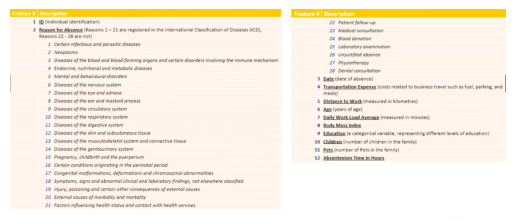

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.Figure(figsize=(16,9))
img = plt.Figure(figsize=(16,9))

img = mpimg.imread('Features_description.png')
plt.imshow(img)
plt.show()


In [54]:
df['Reason for Absence'].unique()
#for ML u need to give only numerical data

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16])

In [55]:
# one hot endcoding
reason_columns = pd.get_dummies(df['Reason for Absence'], drop_first=True)

In [56]:
df = df.drop(['Reason for Absence'],axis=1)

In [57]:
reason_columns

,1,2,3,4,5,6,7,8,9,10,...,18,19,21,22,23,24,25,26,27,28
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
696,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
697,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
698,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [58]:
reason_1 = reason_columns.loc[:, 1:14].max(axis=1)
reason_2 = reason_columns.loc[:, 15:17].max(axis=1)
reason_3 = reason_columns.loc[:, 18:21].max(axis=1)
reason_4 = reason_columns.loc[:, 22:].max(axis=1)

df = pd.concat([df, reason_1,reason_2,reason_3,reason_4],axis=1)
df.head()


,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,0,1,2,3
0,2015-07-07,289,36,33,239.554,30,1,2,1,4,False,False,False,True
1,2015-07-14,118,13,50,239.554,31,1,1,0,0,False,False,False,False
2,2015-07-15,179,51,38,239.554,31,1,0,0,2,False,False,False,True
3,2015-07-16,279,5,39,239.554,24,1,2,0,4,True,False,False,False
4,2015-07-23,289,36,33,239.554,30,1,2,1,2,False,False,False,True


In [59]:
Column_Names = ['Date', 'Transportation Expense','Distance to Work','Age','Daily Work Load Average','Body Mass Index','Education','Children','Pets','Absenteeism Time in Hours', 'Reason_1', 'Reason_2', 'Reason_3', 'Reason_4'	]
df.columns = Column_Names
                

In [60]:
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4
0,2015-07-07,289,36,33,239.554,30,1,2,1,4,False,False,False,True
1,2015-07-14,118,13,50,239.554,31,1,1,0,0,False,False,False,False
2,2015-07-15,179,51,38,239.554,31,1,0,0,2,False,False,False,True
3,2015-07-16,279,5,39,239.554,24,1,2,0,4,True,False,False,False
4,2015-07-23,289,36,33,239.554,30,1,2,1,2,False,False,False,True


In [61]:
df['Date'] = pd.to_datetime(df['Date'], format = '%d %M %Y')
list_months = []

In [62]:
for i in range(df.shape[0]):
    list_months.append(df['Date'][i].month)

df['Month'] = list_months


In [63]:
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4,Month
0,2015-07-07,289,36,33,239.554,30,1,2,1,4,False,False,False,True,7
1,2015-07-14,118,13,50,239.554,31,1,1,0,0,False,False,False,False,7
2,2015-07-15,179,51,38,239.554,31,1,0,0,2,False,False,False,True,7
3,2015-07-16,279,5,39,239.554,24,1,2,0,4,True,False,False,False,7
4,2015-07-23,289,36,33,239.554,30,1,2,1,2,False,False,False,True,7


In [65]:
def date_to_weekday(date_value):
    return date_value.weekday()

df['Day of the week'] = df['Date'].apply(date_to_weekday)

In [66]:
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4,Month,Day of the week
0,2015-07-07,289,36,33,239.554,30,1,2,1,4,False,False,False,True,7,1
1,2015-07-14,118,13,50,239.554,31,1,1,0,0,False,False,False,False,7,1
2,2015-07-15,179,51,38,239.554,31,1,0,0,2,False,False,False,True,7,2
3,2015-07-16,279,5,39,239.554,24,1,2,0,4,True,False,False,False,7,3
4,2015-07-23,289,36,33,239.554,30,1,2,1,2,False,False,False,True,7,3


In [ ]:
df = df.drop(['Date'],axis=1)


In [69]:
df.head()

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4,Month,Day of the week
0,289,36,33,239.554,30,1,2,1,4,False,False,False,True,7,1
1,118,13,50,239.554,31,1,1,0,0,False,False,False,False,7,1
2,179,51,38,239.554,31,1,0,0,2,False,False,False,True,7,2
3,279,5,39,239.554,24,1,2,0,4,True,False,False,False,7,3
4,289,36,33,239.554,30,1,2,1,2,False,False,False,True,7,3


In [70]:
df['Education'].unique()

array([1, 3, 2, 4])

In [71]:
df['Education'] = df['Education'].map({1:0, 2:1,3:1,4:1})

In [72]:
df_preprocessed = df.copy()

In [73]:
df['Absenteeism Time in Hours'].median()

np.float64(3.0)

In [74]:
targets = np.where(df['Absenteeism Time in Hours'] > df['Absenteeism Time in Hours'].median(),1,0)

In [75]:
targets

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,

In [76]:
targets.sum()/targets.shape[0]

np.float64(0.45571428571428574)

In [ ]:
# data should be equally distributed for training ML model. So the model accuracy will increase.
#This is all data preprocessing part